#

In [6]:
# Langkah 1: Mengunggah file dari lokal
from google.colab import files
import pandas as pd

# Unggah file Excel dari komputer Anda
uploaded = files.upload()

# Load file Excel (pastikan nama file sesuai dengan yang diunggah)
file_name = list(uploaded.keys())[0]  # Nama file pertama yang diunggah
data = pd.read_excel(file_name)

# Menampilkan data awal untuk memastikan kolom-kolom yang dibutuhkan
data.head()


Saving output_catur_white.xlsx to output_catur_white (2).xlsx


,White,Black,Date,Result,Moves
0,O0OO0Q0o0O0OQ0o,Feel_Special,2024.10.01,1-0,c4 f5 Nc3 e5 g3 Nc6 Bg2 d6 d3 g6 e3 Bg7 Nge2 N...
1,O0OO0Q0o0O0OQ0o,Yoda1992,2024.10.01,0-1,c4 Nf6 Nc3 c5 g3 g6 Bg2 Bg7 d3 O-O Bd2 Nc6 Qc1...
2,O0OO0Q0o0O0OQ0o,bach12345_lfay,2024.10.01,0-1,c4 b6 Nf3 Bb7 g3 e6 Bg2 f5 O-O Nf6 d3 Be7 Nc3 ...
3,O0OO0Q0o0O0OQ0o,gmjoey1,2024.10.01,1-0,c4 e5 d3 c6 Nf3 Qc7 g3 d5 cxd5 cxd5 Bg2 Nf6 O-...
4,O0OO0Q0o0O0OQ0o,PracticeMakesOK,2024.10.01,1-0,c4 e6 Nc3 d5 e3 Nf6 Nf3 c5 cxd5 exd5 d4 Nc6 Bb...


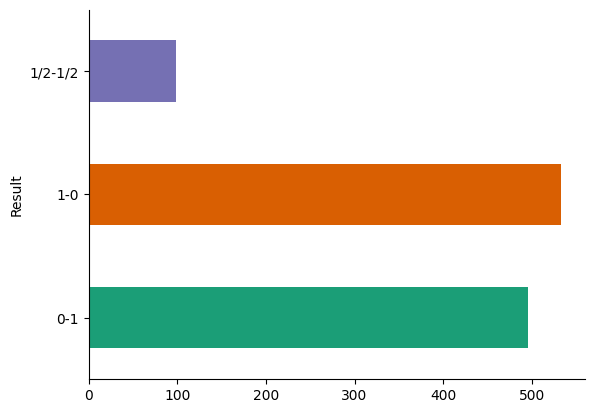

In [7]:
# @title Result

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# Memilih hanya kolom 'Result' dan 'Moves'
data_selected = data[['Result', 'Moves']]
data_selected.head()


,Result,Moves
0,1-0,c4 f5 Nc3 e5 g3 Nc6 Bg2 d6 d3 g6 e3 Bg7 Nge2 N...
1,0-1,c4 Nf6 Nc3 c5 g3 g6 Bg2 Bg7 d3 O-O Bd2 Nc6 Qc1...
2,0-1,c4 b6 Nf3 Bb7 g3 e6 Bg2 f5 O-O Nf6 d3 Be7 Nc3 ...
3,1-0,c4 e5 d3 c6 Nf3 Qc7 g3 d5 cxd5 cxd5 Bg2 Nf6 O-...
4,1-0,c4 e6 Nc3 d5 e3 Nf6 Nf3 c5 cxd5 exd5 d4 Nc6 Bb...


In [10]:
# Membuat encoding one-hot untuk kolom 'Result'
result_one_hot = pd.get_dummies(data_selected['Result'], prefix='Result')
result_one_hot.head()


,Result_0-1,Result_1-0,Result_1/2-1/2
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,False
4,False,True,False


In [11]:
# Mengambil dua langkah pertama di kolom 'Moves'
data_selected['First_Two_Moves'] = data_selected['Moves'].apply(lambda x: ' '.join(x.split()[:2]))
data_selected.head()


<ipython-input-11-6d46bb81c13b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['First_Two_Moves'] = data_selected['Moves'].apply(lambda x: ' '.join(x.split()[:2]))


,Result,Moves,First_Two_Moves
0,1-0,c4 f5 Nc3 e5 g3 Nc6 Bg2 d6 d3 g6 e3 Bg7 Nge2 N...,c4 f5
1,0-1,c4 Nf6 Nc3 c5 g3 g6 Bg2 Bg7 d3 O-O Bd2 Nc6 Qc1...,c4 Nf6
2,0-1,c4 b6 Nf3 Bb7 g3 e6 Bg2 f5 O-O Nf6 d3 Be7 Nc3 ...,c4 b6
3,1-0,c4 e5 d3 c6 Nf3 Qc7 g3 d5 cxd5 cxd5 Bg2 Nf6 O-...,c4 e5
4,1-0,c4 e6 Nc3 d5 e3 Nf6 Nf3 c5 cxd5 exd5 d4 Nc6 Bb...,c4 e6


In [12]:
# Membuat one-hot encoding untuk 'First_Two_Moves'
moves_one_hot = pd.get_dummies(data_selected['First_Two_Moves'], prefix='Move')
moves_one_hot.head()


,Move_Nf3 Nf6,Move_b3 Nc6,Move_b3 Nf6,Move_b3 b5,Move_b3 c5,Move_b3 c6,Move_b3 d5,Move_b3 d6,Move_b3 e5,Move_b3 e6,...,Move_e4 c6,Move_e4 d5,Move_e4 d6,Move_e4 e5,Move_e4 e6,Move_e4 g5,Move_e4 g6,Move_g3 Nf6,Move_g3 d5,Move_g3 e5
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Menggabungkan hasil encoding ke dalam satu DataFrame
final_data = pd.concat([result_one_hot, moves_one_hot], axis=1)
final_data.head()


,Result_0-1,Result_1-0,Result_1/2-1/2,Move_Nf3 Nf6,Move_b3 Nc6,Move_b3 Nf6,Move_b3 b5,Move_b3 c5,Move_b3 c6,Move_b3 d5,...,Move_e4 c6,Move_e4 d5,Move_e4 d6,Move_e4 e5,Move_e4 e6,Move_e4 g5,Move_e4 g6,Move_g3 Nf6,Move_g3 d5,Move_g3 e5
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Menyimpan hasil ke file Excel baru
output_file = 'preprocessed_output.xlsx'
final_data.to_excel(output_file, index=False)
print(f'Data berhasil disimpan ke {output_file}')


Data berhasil disimpan ke preprocessed_output.xlsx


In [15]:
from google.colab import files

# Unduh file preprocessed_output.xlsx
files.download('preprocessed_output.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>